<a href="https://colab.research.google.com/github/marinaladeira/Projeto/blob/main/clusters_inicial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("treated_data.csv")
df.head()

,INDICE,LATITUDE,LONGITUDE,CODIGO_ROTA,SEQUENCIA,LOGRADOURO,NUMERO
0,401103972.0,-22.858956,-43.338632,70324,3360.0,mons inacio da silva,545
1,402281829.0,-22.830781,-43.395010,8848,309.0,maria eliza,80
2,400507411.0,-22.821902,-43.415018,7446,254.0,dona lurdes,4
3,400533412.0,-22.834372,-43.410329,7557,80.0,lucio jose filho,81
4,400515070.0,-22.861150,-43.338667,70324,3180.0,mar del plata,490


In [ ]:
X = df[['LATITUDE', 'LONGITUDE']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

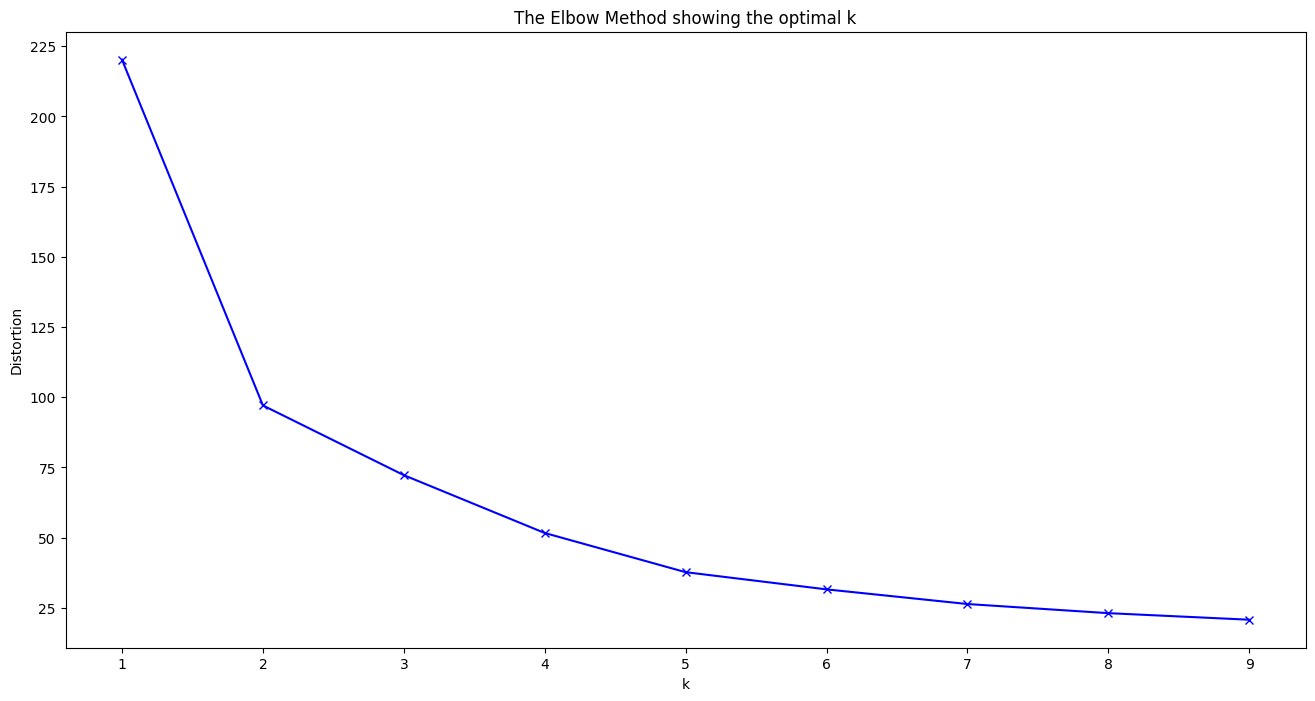

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Método do Cotovelo
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# Suponha que o número ideal de clusters seja 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Adicionar as labels dos clusters ao dataframe
df['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


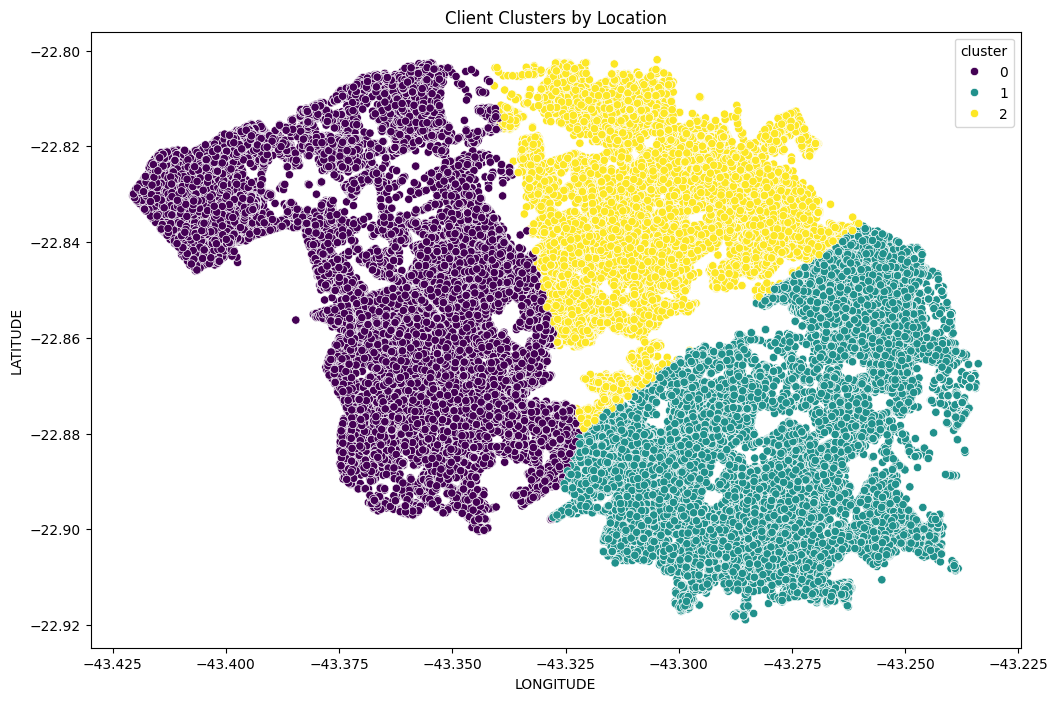

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='LONGITUDE', y='LATITUDE', hue='cluster', palette='viridis', legend='full')
plt.title('Client Clusters by Location')
plt.show()
